<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-21 12:21:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.2MB/s    in 2.6s    

2025-08-21 12:21:13 (59.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



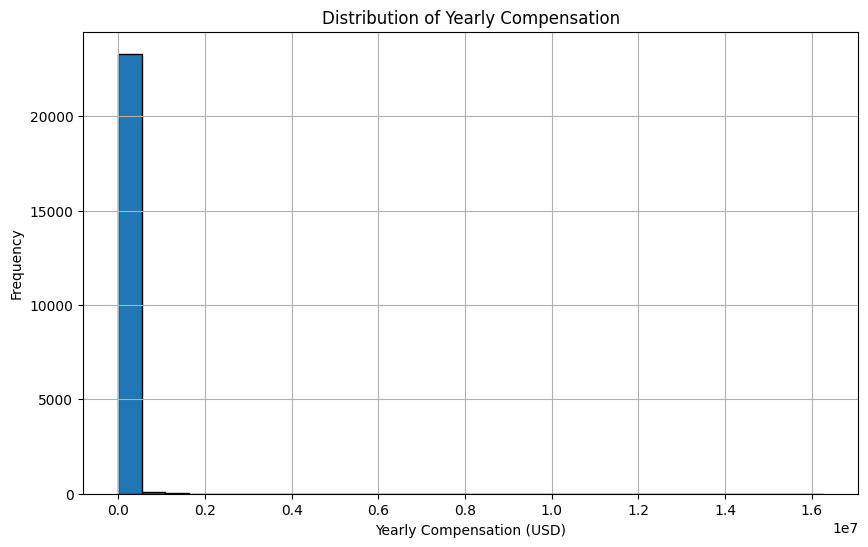

In [5]:
## Write your code here

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'], bins=30, edgecolor='black')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation')
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



0        Under 18 years old
1           35-44 years old
2           45-54 years old
3           18-24 years old
4           18-24 years old
                ...        
65432       18-24 years old
65433       25-34 years old
65434       25-34 years old
65435       18-24 years old
65436       18-24 years old
Name: Age, Length: 65437, dtype: object
0        1
1        4
2        5
3        2
4        2
        ..
65432    2
65433    3
65434    3
65435    2
65436    2
Name: AgeNumeric, Length: 65437, dtype: int64


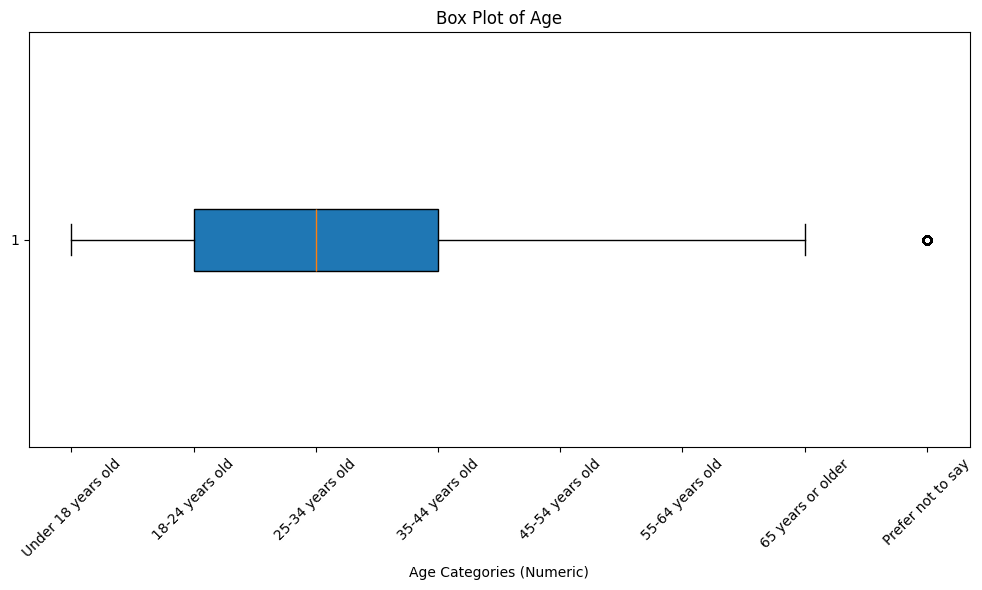

In [6]:
## Write your code here

# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df['AgeNumeric'] = df['Age'].map(age_mapping)

print(df['Age'])
print(df['AgeNumeric'])

# Create the box plot for 'AgeNumeric'
plt.figure(figsize=(10, 6))
plt.boxplot(df['AgeNumeric'].dropna(), vert=False, patch_artist=True)

# Add labels and title
plt.xlabel('Age Categories (Numeric)')
plt.title('Box Plot of Age')

# Customizing the x-axis with category labels
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



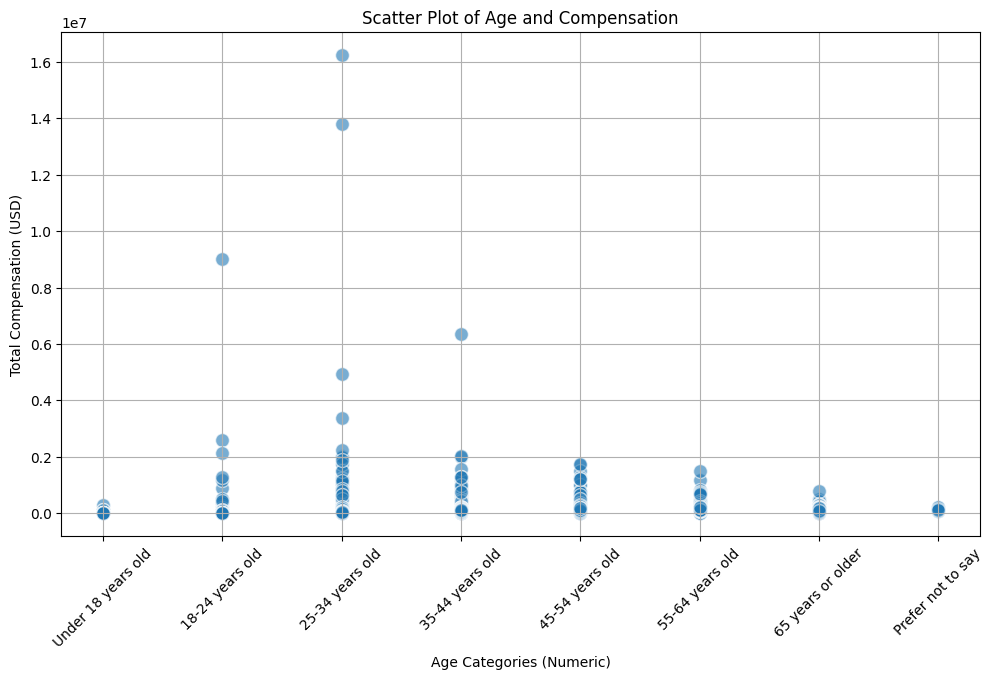

In [8]:
## Write your code here

# Define a mapping for age categories to numerical values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

# Apply the mapping to the 'Age' column
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Create the scatter plot for 'AgeNumeric' and 'CompTotal'
plt.figure(figsize=(10, 6))
plt.scatter(df['AgeNumeric'], df['ConvertedCompYearly'], alpha=0.6, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Age Categories (Numeric)')
plt.ylabel('Total Compensation (USD)')
plt.title('Scatter Plot of Age and Compensation')
plt.grid(True)
plt.tight_layout()

# Customizing the x-axis with category labels
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)

# Show the plot
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


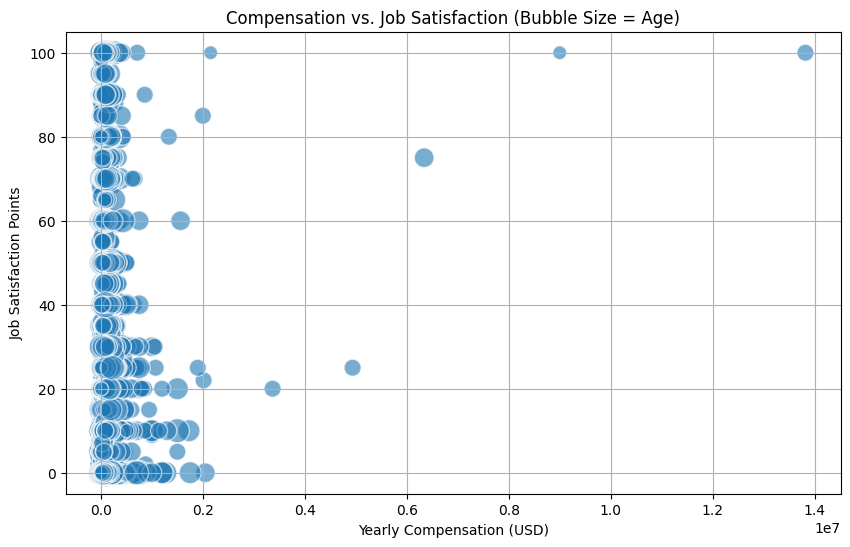

In [9]:
## Write your code here

# Assuming 'AgeNumeric' is already created and in df_cleaned

plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], 
            s=df['AgeNumeric'] * 50, alpha=0.6, edgecolors='w')

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.grid(True)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



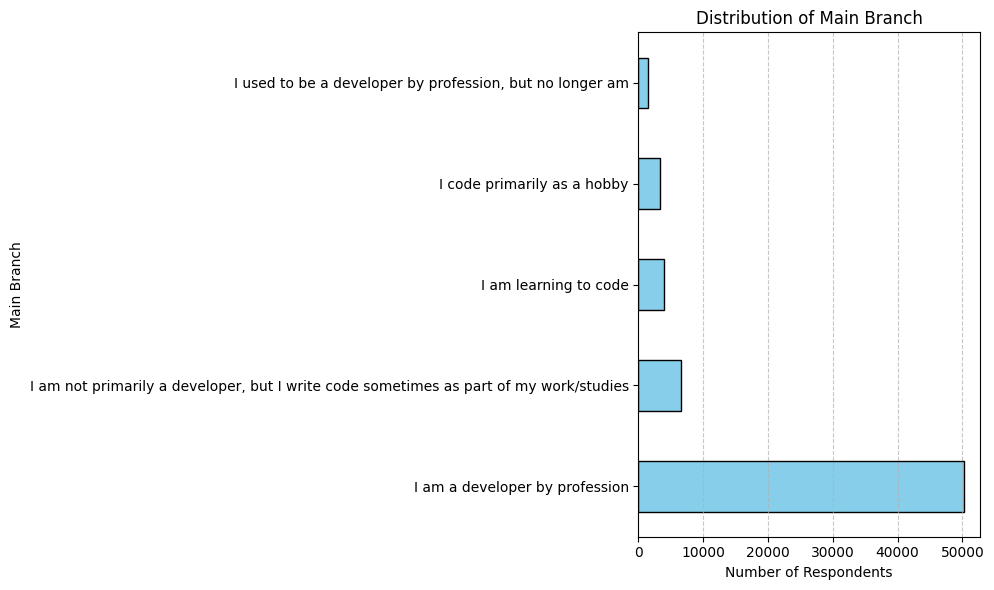

In [10]:
## Write your code here

# Calculate the value counts for 'MainBranch'
main_branch_counts = df['MainBranch'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



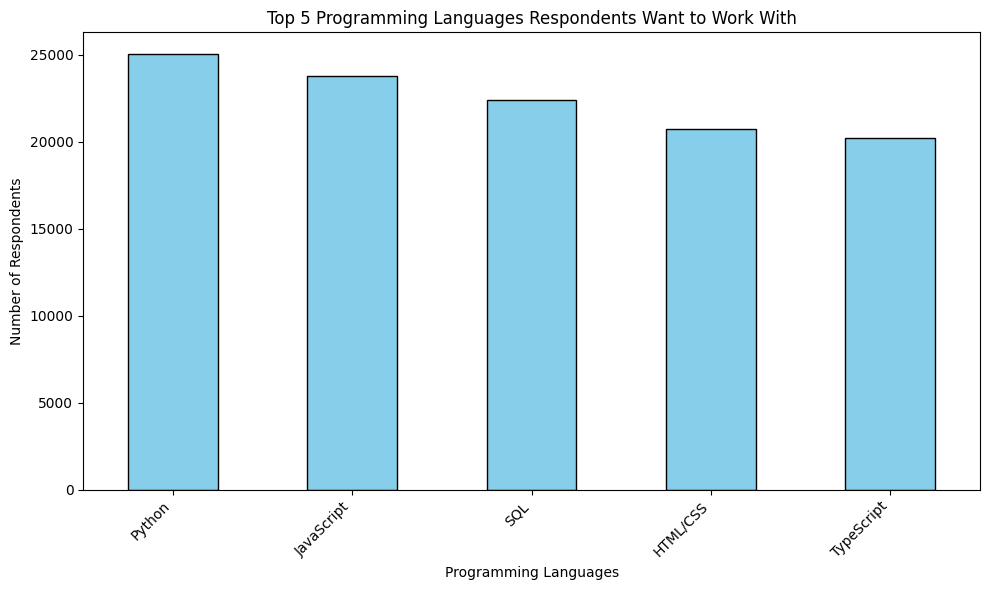

In [11]:
## Write your code here

# Split the 'LanguageWantToWorkWith' column and explode it
languages_wanted = df['LanguageWantToWorkWith'].str.split(';').explode()

# Count the occurrences of each language
language_counts = languages_wanted.value_counts()

# Get the top 5 languages
top_5_languages = language_counts.head(5)

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


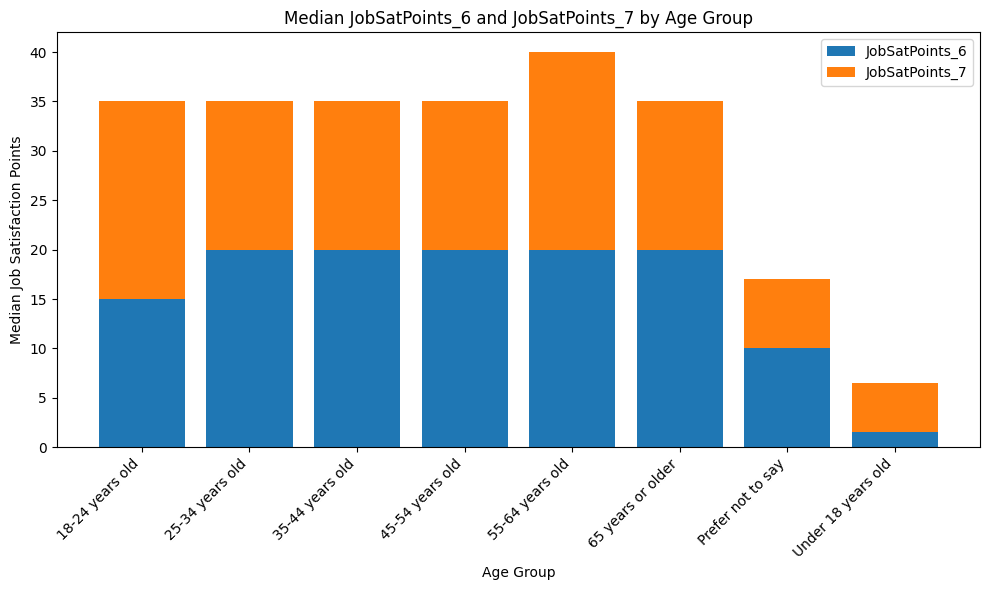

In [12]:
## Write your code here

## Write your code here
# Group data by age and calculate the median of JobSatPoints_6 and JobSatPoints_7
age_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_job_sat['Age'], age_job_sat['JobSatPoints_6'], label='JobSatPoints_6')
plt.bar(age_job_sat['Age'], age_job_sat['JobSatPoints_7'], bottom=age_job_sat['JobSatPoints_6'], label='JobSatPoints_7')

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.title('Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



DatabaseHaveWorkedWith
PostgreSQL                    25536
MySQL                         21099
SQLite                        17365
Microsoft SQL Server          13275
MongoDB                       13007
Redis                         10463
MariaDB                        8991
Elasticsearch                  6533
Oracle                         5273
Dynamodb                       4138
Firebase Realtime Database     3018
Cloud Firestore                2842
BigQuery                       2531
Microsoft Access               2193
Supabase                       2078
H2                             2006
Cosmos DB                      1746
Snowflake                      1364
InfluxDB                       1338
Cassandra                      1268
Databricks SQL                 1003
Neo4J                           998
IBM DB2                         914
Clickhouse                      890
Solr                            766
DuckDB                          710
Firebird                        563
Couch

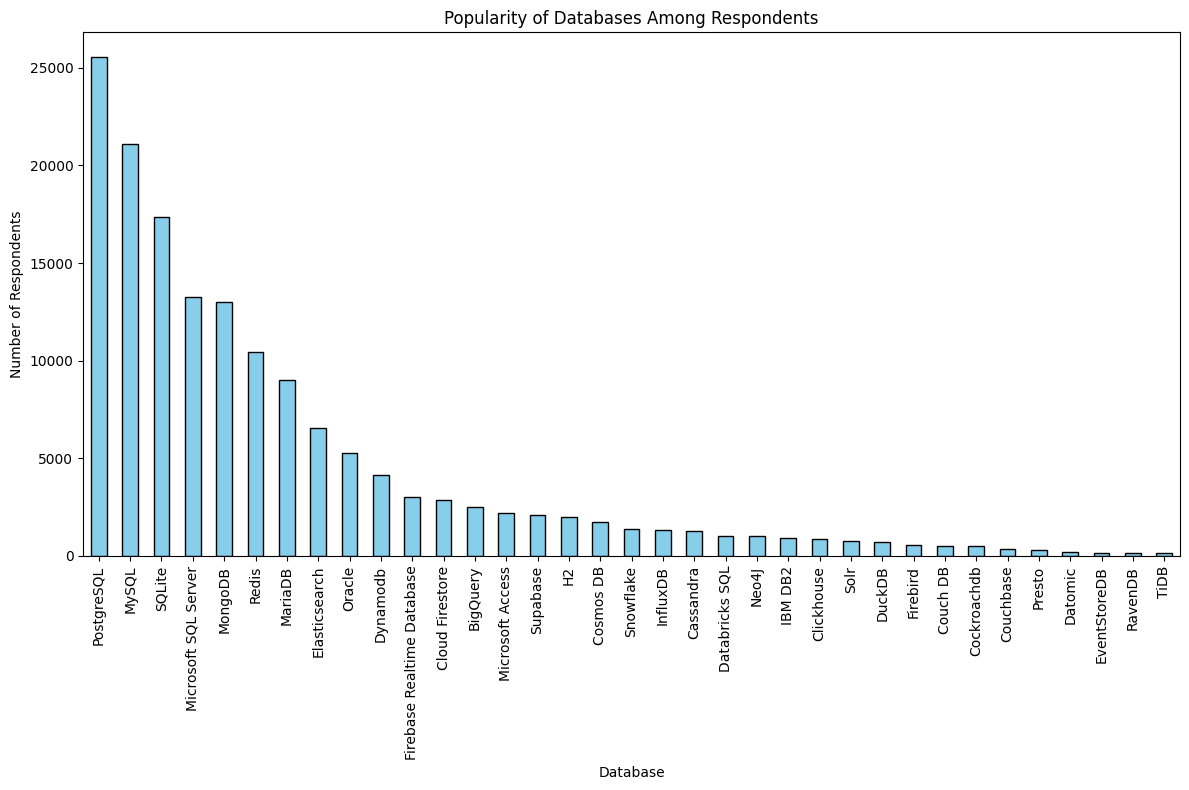

In [13]:
## Write your code here

# Split the 'DatabaseHaveWorkedWith' column values and create a new DataFrame
databases = df['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count the frequency of each database
database_counts = databases.value_counts()

# Display the counts for each database
print(database_counts)

# Create the bar chart for database popularity
plt.figure(figsize=(12, 8))
database_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Popularity of Databases Among Respondents')

# Show the plot
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



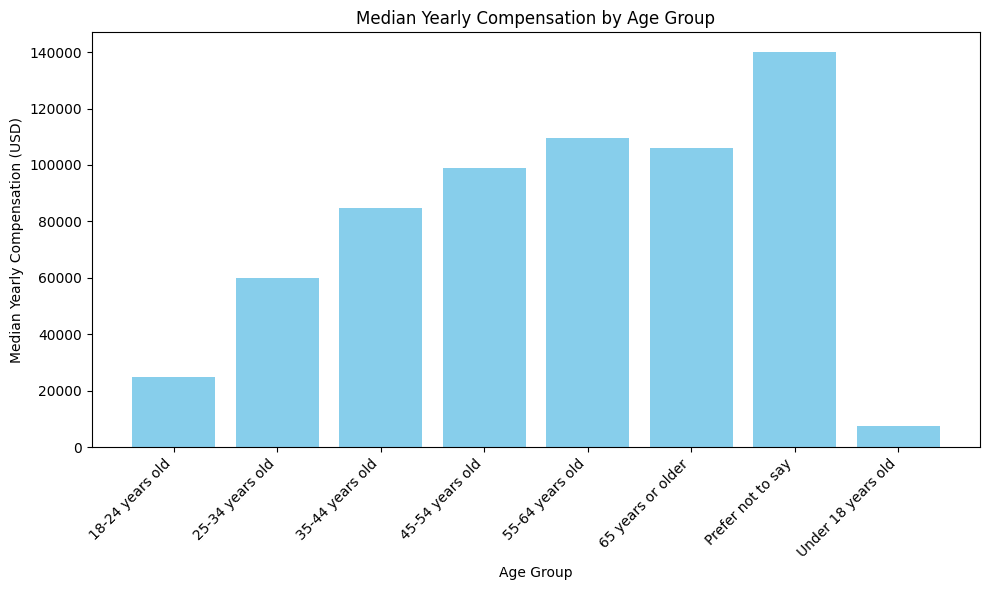

In [14]:
## Write your code here

# Group data by age and calculate the median ConvertedCompYearly
age_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_compensation['Age'], age_compensation['ConvertedCompYearly'], color='skyblue')

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Median Yearly Compensation by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



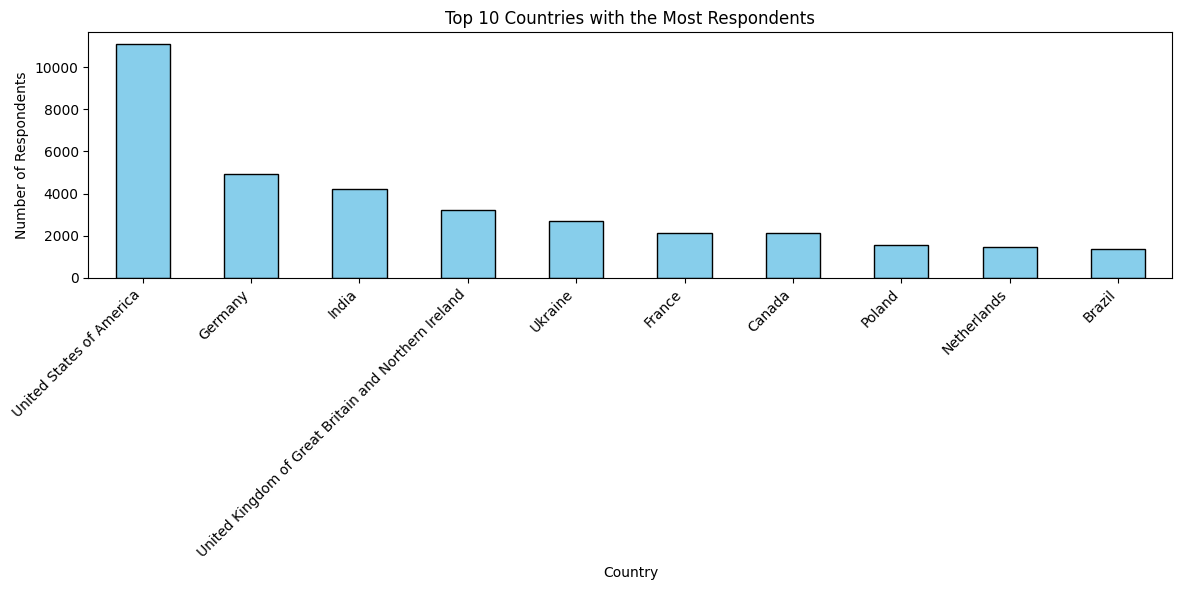

In [16]:
## Write your code here

# Calculate the number of respondents for each country
country_counts = df['Country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Countries with the Most Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
